# Task 1 - Data Collection
Here you will obtain the required data for the analysis. As described in the project instructions, you will perform a web scrap to obtain data from the NCDC website, import data from the JoHn Hopkins repository, and import the provided external data.



# A - NCDC Website scrap
Website - https://covid19.ncdc.gov.ng/

In [8]:
# Importing all libraries
import os
os.chdir('C:\\Users\\OCHAI ODEH\\Downloads\\Nigeriadata')
import requests
import numpy as np
import urllib.request
import pandas as pd
import csv
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')


In [9]:
# checking response of server to get url request

url = 'https://covid19.ncdc.gov.ng'
status_code = requests.get(url)
status_code

<Response [200]>

In [11]:
# Reading NCDC data from url to a DataFrame object.
url = 'https://covid19.ncdc.gov.ng'
html = requests.get(url).content
df_list = pd.read_html(html)

#Saving the data from link to object nig_covid_cases
nig_covid_cases = df_list[-1]
print(nig_covid_cases)
nig_covid_cases.to_csv('ncdcdata.csv')


   States Affected  No. of Cases (Lab Confirmed)  No. of Cases (on admission)  \
0            Lagos                        102877                          129   
1              FCT                         29075                          146   
2           Rivers                         17680                          262   
3           Kaduna                         11467                           11   
4              Oyo                         10327                            6   
5          Plateau                         10292                           18   
6              Edo                          7821                          102   
7             Ogun                          5810                           11   
8            Delta                          5631                          349   
9             Ondo                          5173                          315   
10            Kano                          5169                           41   
11       Akwa Ibom          

# B - John Hopkins Data Repository
Here you will obtain data from the John Hopkins repository. Your task here involves saving the data from the GitHub repo link to DataFrame for further analysis. Find the links below.

Global Daily Confirmed Cases - Click Here Global Daily Recovered Cases - Click Here Global Daily Death Cases - Click Here




In [12]:
#Saving the data from John Hopkin's repository's link into a DataFrame object

confirmed_global= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
covid19_recovered_global = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
covid19_deaths_global = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [13]:
JH_confirmed_global=confirmed_global
JH_deaths_global=covid19_deaths_global
JH_recovered_global=covid19_recovered_global

In [14]:
#Reading some of the data from John Hopkin's repository
JH_deaths_global.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/13/22,8/14/22,8/15/22,8/16/22,8/17/22,8/18/22,8/19/22,8/20/22,8/21/22,8/22/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7758,7758,7759,7759,7759,7759,7759,7759,7762,7767
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3570,3571,3571,3573,3574,3574,3575,3576,3576,3576
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6878,6878,6878,6878,6878,6878,6878,6878,6878,6878
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,154,154,154,154,154,154,154,154,154,154
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1917,1917,1917,1917,1917,1917,1917,1917,1917,1917


# External Data

Save the external data to a DataFrame
External Data includes but not limited to: covid_external.csv, Budget data.csv, RealGDP.csv

In [15]:
#Saving external data into dataaframe object
covid_external = pd.read_csv('covid_external.csv')
Budget_data = pd.read_csv('Budget data.csv')
RealGDP = pd.read_csv('RealGDP.csv')
covidnig = pd.read_csv('covidnig.csv')

In [16]:
#Reading some of the dataframes
covidnig.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"26,708","2,435","24,037",236
1,FCT,"9,627","2,840","6,694",93
2,Kaduna,"4,504",579,"3,877",48
3,Plateau,"4,262",280,"3,948",34
4,Oyo,"3,788",368,"3,374",46


In [17]:
# Combining all 'external' dataframe objects provided using the merge() function on identical column
merged_t1 = pd.merge(covid_external, Budget_data, on= 'states', how ='outer', sort= True)

In [18]:
#Renaming of a column is necessary if web scrapped data from NCDC's link is to be merged with 'external' dataframe on isentical column 'states'.
covidnig_rn = covidnig.rename(columns={'States Affected':'states'})

In [19]:
#Checking if Renaming was successful and type of data in imported data from NCDC's link.
covidnig_rn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   states                        37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     object
 2   No. of Cases (on admission)   37 non-null     object
 3   No. Discharged                37 non-null     object
 4   No. of Deaths                 37 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 1.6+ KB


In [20]:
# values of data are object
# All data values has to be converted to appropriate type (numeric). We use pd.to_numeric and apply the conversion.
covidnig_rndf = covidnig_rn[['No. of Cases (Lab Confirmed)', 'No. of Cases (on admission)', 'No. Discharged']].columns
covidnig_rn[covidnig_rndf] = covidnig_rn[covidnig_rndf].apply(pd.to_numeric,errors='coerce')

In [21]:
covidnig_rn.replace(',','', regex=True, inplace=True)


In [22]:
#Final merger of external dataframe and NCDC's data also using the pd.merge() function
merged_t2 = pd.merge(merged_t1,covidnig_rn, on= 'states', how ='outer', sort=True)

In [23]:
combined_df = merged_t2.append(RealGDP, ignore_index=True)

In [24]:
#Viewing the data
#Obtain basic information about the merged data using the head() and info() method.
combined_df.head()

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,...,Revised_budget (Bn),No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths,Year,Q1,Q2,Q3,Q4
0,Abia,South East,4190000.0,0.2,0.9,0.6,0.1,0.3,0.9,0.2,...,102.70,980.0,25.0,945.0,10.0,NaN,NaN,NaN,NaN,NaN
1,Adamawa,North East,4672000.0,0.8,0.5,0.6,0.9,0.7,0.3,0.7,...,139.31,355.0,96.0,238.0,21.0,NaN,NaN,NaN,NaN,NaN
2,Akwa Ibom,South East,6093000.0,0.7,0.8,0.7,0.6,0.8,0.8,0.5,...,NaN,395.0,44.0,342.0,9.0,NaN,NaN,NaN,NaN,NaN
3,Akwa-Ibom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,366.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Anambra,South East,6050000.0,0.6,0.9,1.0,0.6,0.2,1.0,0.0,...,112.80,299.0,6.0,274.0,19.0,NaN,NaN,NaN,NaN,NaN


In [25]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   states                        41 non-null     object 
 1   region                        37 non-null     object 
 2   Population                    37 non-null     float64
 3   Overall CCVI Index            37 non-null     float64
 4   Age                           37 non-null     float64
 5   Epidemiological               37 non-null     float64
 6   Fragility                     37 non-null     float64
 7   Health System                 37 non-null     float64
 8   Population Density            37 non-null     float64
 9   Socio-Economic                37 non-null     float64
 10   Transport Availability       37 non-null     float64
 11  Acute IHR                     37 non-null     float64
 12  Initial_budget (Bn)           37 non-null     float64
 13  Revised

In [30]:
Budget_data.nunique()

states                 37
Initial_budget (Bn)    37
Revised_budget (Bn)    37
dtype: int64

In [31]:
covid_external.nunique()

states                     37
region                      6
Population                 37
Overall CCVI Index         11
Age                        11
Epidemiological            11
Fragility                  11
Health System              11
Population Density         11
Socio-Economic             11
 Transport Availability    11
Acute IHR                  22
dtype: int64

In [32]:
covidnig.nunique()

States Affected                 37
No. of Cases (Lab Confirmed)    37
No. of Cases (on admission)     33
No. Discharged                  37
No. of Deaths                   30
dtype: int64

In [33]:
RealGDP.nunique()

Year    7
Q1      7
Q2      7
Q3      7
Q4      7
dtype: int64

# Task 2 - View the data
Obtain basic information about the data using the head() and info() method.

# Viewing the separate external data and NCDC's data: Obtaining basic information about the data using the head() and info() method.

In [34]:
covid_external = pd.read_csv('covid_external.csv')
Budget_data = pd.read_csv('Budget data.csv')
RealGDP = pd.read_csv('RealGDP.csv')
covidnig = pd.read_csv('covidnig.csv')

In [35]:
covid_external.head()

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84


In [36]:
covid_external.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   states                   37 non-null     object 
 1   region                   37 non-null     object 
 2   Population               37 non-null     int64  
 3   Overall CCVI Index       37 non-null     float64
 4   Age                      37 non-null     float64
 5   Epidemiological          37 non-null     float64
 6   Fragility                37 non-null     float64
 7   Health System            37 non-null     float64
 8   Population Density       37 non-null     float64
 9   Socio-Economic           37 non-null     float64
 10   Transport Availability  37 non-null     float64
 11  Acute IHR                37 non-null     float64
dtypes: float64(9), int64(1), object(2)
memory usage: 3.6+ KB


In [37]:
Budget_data.head()

,states,Initial_budget (Bn),Revised_budget (Bn)
0,Abia,136.60,102.70
1,Adamawa,183.30,139.31
2,Akwa-Ibom,597.73,366.00
3,Anambra,137.10,112.80
4,Bauchi,167.20,128.00


In [38]:
Budget_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   states               37 non-null     object 
 1   Initial_budget (Bn)  37 non-null     float64
 2   Revised_budget (Bn)  37 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1016.0+ bytes


In [39]:
RealGDP.head()

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59


In [40]:
RealGDP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    7 non-null      int64  
 1   Q1      7 non-null      float64
 2   Q2      7 non-null      float64
 3   Q3      7 non-null      float64
 4   Q4      7 non-null      float64
dtypes: float64(4), int64(1)
memory usage: 408.0 bytes


In [41]:
#Removing coma from the data values from NCDC website
covidnig.replace(',','', regex=True, inplace=True)


In [42]:
covidnig.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,26708,2435,24037,236
1,FCT,9627,2840,6694,93
2,Kaduna,4504,579,3877,48
3,Plateau,4262,280,3948,34
4,Oyo,3788,368,3374,46


In [43]:
covidnig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     object
 2   No. of Cases (on admission)   37 non-null     object
 3   No. Discharged                37 non-null     object
 4   No. of Deaths                 37 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 1.6+ KB


In [44]:
# Converting NCDC's data into appropriate data type (from object to int)
newcovidnig = covidnig[['No. of Cases (Lab Confirmed)', 'No. of Cases (on admission)', 'No. Discharged']].columns
covidnig[newcovidnig] = covidnig[newcovidnig].apply(pd.to_numeric,errors='coerce')

In [45]:
# Checking: conversion is successful
covidnig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     int64 
 2   No. of Cases (on admission)   37 non-null     int64 
 3   No. Discharged                37 non-null     int64 
 4   No. of Deaths                 37 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.6+ KB


# Task 3 - Data Cleaning and Preparation

From the information obtained above, you will need to fix the data format.
Examples:

>Convert to appropriate data type.
>Rename the columns of the scraped data.
>Remove comma(,) in numerical data
>Extract daily data for Nigeria from the Global daily cases data

TODO A - Clean the scraped data

In [46]:
#Data Cleaning and Preparation: Clean the scraped data
#Renaming columns of dataframe

In [47]:
#Renaming of columns of merged dataframe
combined_df.rename(columns = {'states':'State', 'region': 'Region', 'Initial_budget (Bn)': 'Initial Budget in Billion', 'Revised_budget (Bn)': 'Revised Budget in Billion', 'No. of Cases (Lab Confirmed)': 'Number of Lab Confirmed Cases', 'No. of Cases (on admission)':'Number of Cases on Admission', 'No. Discharged': 'Number of Cases Discharged', 'No. of Deaths': 'Number of Deaths', 'Q1': 'First Quarter', 'Q2': 'Second Quarter', 'Q3': 'Third Quarter', 'Q4':'Fourth Quarter'}, inplace = True)

In [48]:
# Checking if renamig is successful
combined_df.head()

,State,Region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,...,Revised Budget in Billion,Number of Lab Confirmed Cases,Number of Cases on Admission,Number of Cases Discharged,Number of Deaths,Year,First Quarter,Second Quarter,Third Quarter,Fourth Quarter
0,Abia,South East,4190000.0,0.2,0.9,0.6,0.1,0.3,0.9,0.2,...,102.70,980.0,25.0,945.0,10.0,NaN,NaN,NaN,NaN,NaN
1,Adamawa,North East,4672000.0,0.8,0.5,0.6,0.9,0.7,0.3,0.7,...,139.31,355.0,96.0,238.0,21.0,NaN,NaN,NaN,NaN,NaN
2,Akwa Ibom,South East,6093000.0,0.7,0.8,0.7,0.6,0.8,0.8,0.5,...,NaN,395.0,44.0,342.0,9.0,NaN,NaN,NaN,NaN,NaN
3,Akwa-Ibom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,366.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Anambra,South East,6050000.0,0.6,0.9,1.0,0.6,0.2,1.0,0.0,...,112.80,299.0,6.0,274.0,19.0,NaN,NaN,NaN,NaN,NaN


In [49]:
# Checking data tyoes in columns of merged dataframe
combined_df.dtypes

State                             object
Region                            object
Population                       float64
Overall CCVI Index               float64
Age                              float64
Epidemiological                  float64
Fragility                        float64
Health System                    float64
Population Density               float64
Socio-Economic                   float64
 Transport Availability          float64
Acute IHR                        float64
Initial Budget in Billion        float64
Revised Budget in Billion        float64
Number of Lab Confirmed Cases    float64
Number of Cases on Admission     float64
Number of Cases Discharged       float64
Number of Deaths                 float64
Year                             float64
First Quarter                    float64
Second Quarter                   float64
Third Quarter                    float64
Fourth Quarter                   float64
dtype: object

In [54]:
JH_confirmed_global=confirmed_global
JH_deaths_global=covid19_deaths_global
JH_recovered_global=covid19_recovered_global

In [55]:
# Saved global data from John Hopkin's repository

In [56]:
# Saved global data from John Hopkin's repository
JH_confirmed_global=confirmed_global
JH_deaths_global=covid19_deaths_global
JH_recovered_global=covid19_recovered_global

In [57]:
#viewing basic information from John Hopkin's global data
JH_confirmed_global.head(n=205)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/13/22,8/14/22,8/15/22,8/16/22,8/17/22,8/18/22,8/19/22,8/20/22,8/21/22,8/22/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,188820,189045,189343,189477,189710,190010,190254,190435,190643,191040
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,321345,321804,322125,322837,323282,323829,325241,325736,326077,326181
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,269008,269141,269269,269381,269473,269556,269650,269731,269805,269894
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,45899,45899,45899,45899,45975,45975,45975,45975,45975,45975
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,102636,102636,102636,102636,102636,102636,102636,102636,102636,102636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,Cook Islands,New Zealand,-21.236700,-159.777700,0,0,0,0,0,0,...,6209,6209,6240,6265,6265,6265,6265,6265,6265,6265
201,NaN,New Zealand,-40.900600,174.886000,0,0,0,0,0,0,...,1687705,1691261,1696239,1700900,1705597,1709541,1712957,1715165,1718009,1721836
202,NaN,Nicaragua,12.865416,-85.207229,0,0,0,0,0,0,...,14872,14872,14872,14872,14899,14899,14899,14899,14899,14899
203,NaN,Niger,17.607789,8.081666,0,0,0,0,0,0,...,9132,9132,9139,9139,9157,9157,9183,9183,9183,9203


TODO B - Get a Pandas DataFrame for Daily Confirmed Cases in Nigeria. Columns are Date and Cases

TODO C - Get a Pandas DataFrame for Daily Recovered Cases in Nigeria. Columns are Date and Cases

TODO D - Get a Pandas DataFrame for Daily Death Cases in Nigeria. Columns are Date and Cases

In [58]:
#Getting a Pandas DataFrame for Daily Confirmed Cases in Nigeria. Columns are Date and Cases
# The data frames will be restructured to make data accessible and extractable. We restructure dataframe using pd.melt() and drop() method
JH_Daily_confirmed = pd.melt(JH_confirmed_global, id_vars=['Province/State','Country/Region','Lat', 'Long'], var_name='Date', value_name='Confirmed Cases')

In [59]:
# Still converting data tpe: Date column values is to be converted into standard Datetime format
JH_Daily_confirmed['Date'] =  pd.to_datetime(JH_Daily_confirmed['Date'])

In [60]:
#delete other columns aside date and country/region using the drop()method
JH_Daily_Confirmeddf= JH_Daily_confirmed.drop(['Province/State', 'Lat', 'Long'], axis=1, errors ='ignore')


In [61]:
#checking if the formatting of dataframe for global confirmed Cases is as expected
JH_Daily_Confirmeddf

,Country/Region,Date,Confirmed Cases
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0
2,Algeria,2020-01-22,0
3,Andorra,2020-01-22,0
4,Angola,2020-01-22,0
...,...,...,...
269035,West Bank and Gaza,2022-08-22,698384
269036,Winter Olympics 2022,2022-08-22,535
269037,Yemen,2022-08-22,11915
269038,Zambia,2022-08-22,332527


In [62]:
#Applying formatting tools used for global confirmed cases to Dataframe of global recoveries and Deaths

JH_Daily_Recovery = pd.melt(JH_recovered_global, id_vars=['Province/State','Country/Region','Lat', 'Long'], var_name='Date', value_name='Recovered Cases')
JH_Daily_Recovery['Date'] =  pd.to_datetime(JH_Daily_Recovery['Date'])

In [63]:
JH_Daily_Recoverydf= JH_Daily_Recovery.drop(['Province/State', 'Lat', 'Long'], axis=1, errors ='ignore')


In [64]:
JH_Daily_Deaths = pd.melt(JH_deaths_global, id_vars=['Province/State','Country/Region','Lat', 'Long'], var_name='Date', value_name='Death Cases')
JH_Daily_Deaths['Date'] =  pd.to_datetime(JH_Daily_Deaths['Date'])

In [65]:
JH_Daily_Deathsdf= JH_Daily_Deaths.drop(['Province/State', 'Lat', 'Long'], axis=1, errors ='ignore')


In [66]:
#Getting a Pandas DataFrame for Daily Confirmed Cases in Nigeria. Columns are Date and Cases

In [67]:
Nigeria = JH_Daily_confirmed[JH_Daily_confirmed['Country/Region'] == 'Nigeria']

In [68]:
JH_Daily_Confirmed_Nigeriadf= Nigeria[['Date', 'Confirmed Cases']].reset_index(drop = True)

In [69]:
JH_Daily_Confirmed_Nigeriadf

,Date,Confirmed Cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
939,2022-08-18,262748
940,2022-08-19,262748
941,2022-08-20,262912
942,2022-08-21,262912


In [70]:
JH_Daily_Confirmed_Nigeriadf.sum(axis=0)

Confirmed Cases    135384240
dtype: int64

In [71]:
# Get a Pandas DataFrame for Daily Recovered Cases in Nigeria. Columns are Date and Cases

In [72]:
Nigeria = JH_Daily_Recovery[JH_Daily_Recovery['Country/Region'] == 'Nigeria']
JH_Daily_Recovery_Nigeriadf= Nigeria[['Date', 'Recovered Cases']].reset_index(drop = True)

In [73]:
JH_Daily_Recovery_Nigeriadf

,Date,Recovered Cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
939,2022-08-18,0
940,2022-08-19,0
941,2022-08-20,0
942,2022-08-21,0


In [74]:
#Get a Pandas DataFrame for Daily Death Cases in Nigeria. Columns are Date and Cases

In [75]:
# Getting total recovered cases in Nigeria upto Aug. 2022
JH_Daily_Recovery_Nigeriadf.sum(axis=0)

Recovered Cases    39492087
dtype: int64

In [76]:
Nigeria = JH_Daily_Deaths[JH_Daily_Deaths['Country/Region'] == 'Nigeria']
JH_Daily_DeathsNigeriadf= Nigeria[['Date', 'Death Cases']].reset_index(drop = True)

In [77]:
# Getting total Deaths status in Nigeria upto Aug. 2022
JH_Daily_DeathsNigeriadf.sum(axis=0)

Death Cases    1774393
dtype: int64

In [78]:
JH_Daily_DeathsNigeriadf

,Date,Death Cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
939,2022-08-18,3147
940,2022-08-19,3147
941,2022-08-20,3147
942,2022-08-21,3147


# Task 4 - Analysis

Here you will perform some analyses on the datasets. You are welcome to communicate findings in charts and summary.
We have included a few TODOs to help with your analysis. However, do not let this limit your approach, feel free to include more, and be sure to support your findings with chart and summary

TODO A - Generate a plot that shows the Top 10 states in terms of Confirmed Covid cases by Laboratory test

In [ ]:
# To Generate a plot that shows the Top 10 states in terms of Confirmed Covid cases by Laboratory 
#First renaming columns from original dataframe fro link (data cleaning)
covidnig
covidnig.rename(columns = {'No. of Cases (Lab Confirmed)': 'Number of Lab Confirmed Cases', 'No. of Cases (on admission)':'Number of Cases on Admission', 'No. Discharged': 'Number of Cases Discharged', 'No. of Deaths': 'Number of Deaths'}, inplace = True)

In [80]:
covidnig

,States Affected,Number of Lab Confirmed Cases,Number of Cases on Admission,Number of Cases Discharged,Number of Deaths
0,Lagos,26708,2435,24037,236
1,FCT,9627,2840,6694,93
2,Kaduna,4504,579,3877,48
3,Plateau,4262,280,3948,34
4,Oyo,3788,368,3374,46
5,Rivers,3279,232,2987,60
6,Edo,2768,52,2603,113
7,Ogun,2382,174,2175,33
8,Kano,2032,198,1778,56
9,Delta,1843,57,1737,49


In [81]:
#Sorting top 10 states with highest lab confirmed cases by using df.sort_values()

covidnig_lab10confirmed = covidnig.sort_values('Number of Lab Confirmed Cases', ascending = False)
covidnig_lab10confirmed = covidnig_lab10confirmed.iloc[:10,]

In [82]:
#checking top 10 states
covidnig_lab10confirmed

,States Affected,Number of Lab Confirmed Cases,Number of Cases on Admission,Number of Cases Discharged,Number of Deaths
0,Lagos,26708,2435,24037,236
1,FCT,9627,2840,6694,93
2,Kaduna,4504,579,3877,48
3,Plateau,4262,280,3948,34
4,Oyo,3788,368,3374,46
5,Rivers,3279,232,2987,60
6,Edo,2768,52,2603,113
7,Ogun,2382,174,2175,33
8,Kano,2032,198,1778,56
9,Delta,1843,57,1737,49


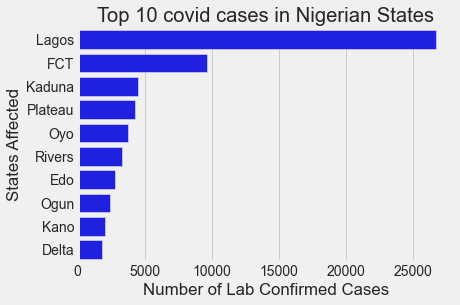

In [83]:
# Plotting top 10 states with corresponding confirmed cases
Top_10_covidngcases = sns.barplot(x='Number of Lab Confirmed Cases', y='States Affected', data=covidnig_lab10confirmed, color = 'blue').set_title('Top 10 covid cases in Nigerian States')


Lagos with the highest covid case and Delta is with the lowest.

In [84]:
#Generating a plot that shows the Top 10 states in terms of Discharged Covid cases. Hint - Sort the values
covidnig_10Discharged = covidnig.sort_values('Number of Cases Discharged', ascending = False)
covidnig_10Discharged = covidnig_10Discharged.iloc[:10,]

TODO B - Generate a plot that shows the Top 10 states in terms of Discharged Covid cases. Hint - Sort the values

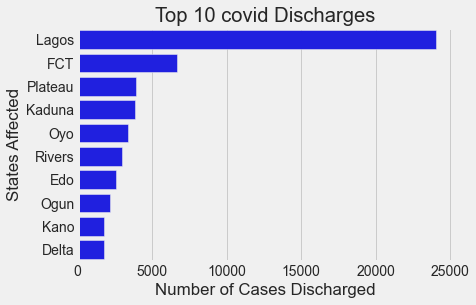

In [185]:
covid_disch_plot = sns.barplot(x='Number of Cases Discharged', y='States Affected', data=covidnig_10Discharged, color = 'blue').set_title('Top 10 covid Discharges')


Lagos showing the highest number of discharges is because it has a high population figure, hihest number of confirmed cases and better health management system.

TODO D - Plot the top 10 Death cases

In [89]:
#Plotting the top 10 Death cases

In [90]:
#Generating a plot that shows the Top 10 states in terms of death cases. Hint - Sort the values
covidnig_10Deaths = covidnig.sort_values('Number of Deaths', ascending = False)
covidnig_10Deaths = covidnig_10Deaths.iloc[:10,]

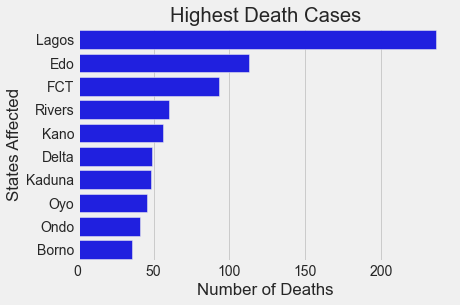

In [91]:
covidngdeaths_plot = sns.barplot(x='Number of Deaths', y='States Affected', data=covidnig_10Deaths, color = 'blue').set_title('Highest Death Cases')


Lagos having the highest death cases also due to its high population and number of confirmed cases.

In [ ]:
#Generate a line plot for the total daily confirmed, recovered and death cases in Nigeria

In [93]:
#extracting data for confirmed cases in Nigeria
confirmed_nig = JH_confirmed_global.groupby('Country/Region').sum().loc['Nigeria']
confirmed_nig

Lat             9.0820
Long            8.6753
1/22/20         0.0000
1/23/20         0.0000
1/24/20         0.0000
              ...     
8/18/22    262748.0000
8/19/22    262748.0000
8/20/22    262912.0000
8/21/22    262912.0000
8/22/22    262912.0000
Name: Nigeria, Length: 946, dtype: float64

In [94]:
TotalConfirmed=JH_Daily_Confirmed_Nigeriadf.sum(axis=0)

In [95]:
TotalRecoveries=JH_Daily_Recovery_Nigeriadf.sum(axis=0)

In [96]:
TotalRecoveries

Recovered Cases    39492087
dtype: int64

In [105]:
TotalDeaths = JH_Daily_Deathsdf.sum(axis=0)

In [98]:
TotalDeaths

Country/Region    AfghanistanAlbaniaAlgeriaAndorraAngolaAntarcti...
Death Cases                                              3210225599
dtype: object

In [99]:
TotalConfirmed

Confirmed Cases    135384240
dtype: int64

In [100]:

Totaldeaths=JH_Daily_Deathsdf.sum(axis=0)

In [101]:
#Getting a dataframe for total daily cases
z = np.array([134858416, 39492087, 1768099])
df2 = pd.DataFrame(z, columns=['total'], index=["Confirmed Cases", "Recovered Cases", "Death Cases"])
df2

,total
Confirmed Cases,134858416
Recovered Cases,39492087
Death Cases,1768099


TODO E - Generate a line plot for the total daily confirmed, recovered and death cases in Nigeria

Text(0.5, 1.0, 'Daily Total Confirmed Cases')

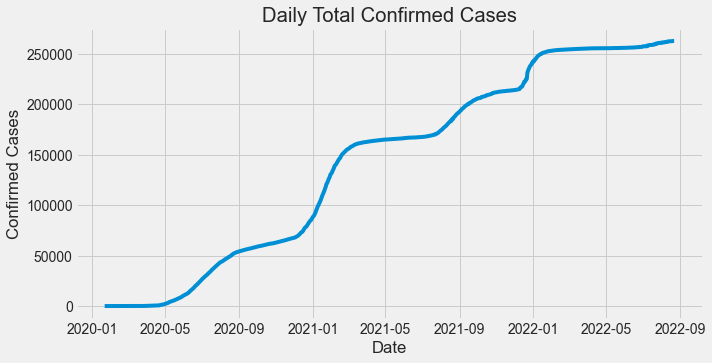

In [102]:
# plotting daily data for confirmed cases in Nigeria using seaborn's line plot
plt.figure(figsize = (10,5))
sns.lineplot(data = JH_Daily_Confirmed_Nigeriadf , x = 'Date', y = 'Confirmed Cases').set_title('Daily Total Confirmed Cases')

In [ ]:
The apparent increase in daily confirmed cases are cummulative values

Text(0.5, 1.0, 'Daily Total Recoveries')

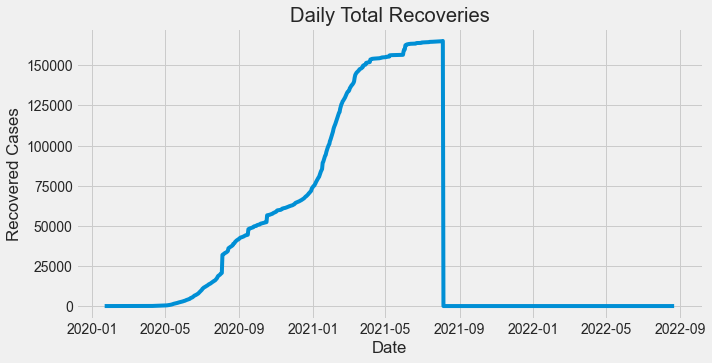

In [103]:
# plotting daily data for Recovered cases in Nigeria using seaborn's line plot
plt.figure(figsize = (10,5))
sns.lineplot(data = JH_Daily_Recovery_Nigeriadf , x = 'Date', y = 'Recovered Cases').set_title('Daily Total Recoveries')

Increased daily recovery cases were recorded. These records again were cummulative values. No record of recovery in Nigeria was recorded from 2021-09 because only death cases were recorded as cummulative lac confirmed cases increased as time of data retrieval in August 2022.

Text(0.5, 1.0, 'Daily Total Deaths')

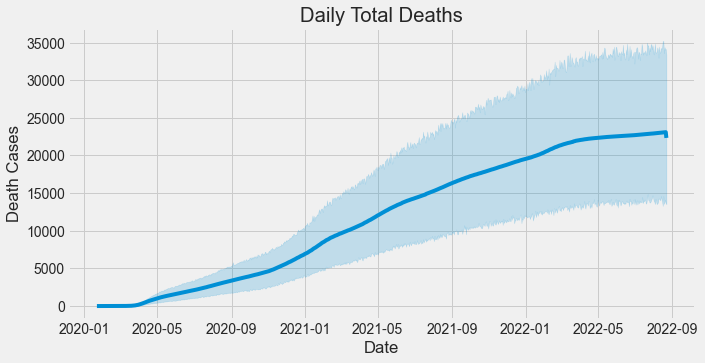

In [106]:
# plotting daily data for death cases in Nigeria using a seaborn's line plot
plt.figure(figsize = (10,5))
sns.lineplot(data = JH_Daily_Deathsdf , x = 'Date', y = 'Death Cases').set_title('Daily Total Deaths')

Record for daily total deaths were cummulatively increasing as at the time of data retrieval in August 2022.

TODO F -

>Determine the daily infection rate, you can use the Pandas diff method to find the derivate of the total cases.
>Generate a line plot for the above

In [107]:
#Determine the daily infection rate, using the Pandas diff method to find the derivate of the total cases.
JH_Daily_Confirmed_Nigeriadf['Infection Rate'] = JH_Daily_Confirmed_Nigeriadf['Confirmed Cases'].diff()

TODO J -

>Provide more analyses by extending TODO G & H. Meaning, determine relationships between more features.
>Provide a detailed summary of your findings.

In [108]:
#Checking if new data has been created
JH_Daily_Confirmed_Nigeriadf

,Date,Confirmed Cases,Infection Rate
0,2020-01-22,0,NaN
1,2020-01-23,0,0.0
2,2020-01-24,0,0.0
3,2020-01-25,0,0.0
4,2020-01-26,0,0.0
...,...,...,...
939,2022-08-18,262748,84.0
940,2022-08-19,262748,0.0
941,2022-08-20,262912,164.0
942,2022-08-21,262912,0.0


<AxesSubplot:xlabel='Date', ylabel='Infection Rate'>

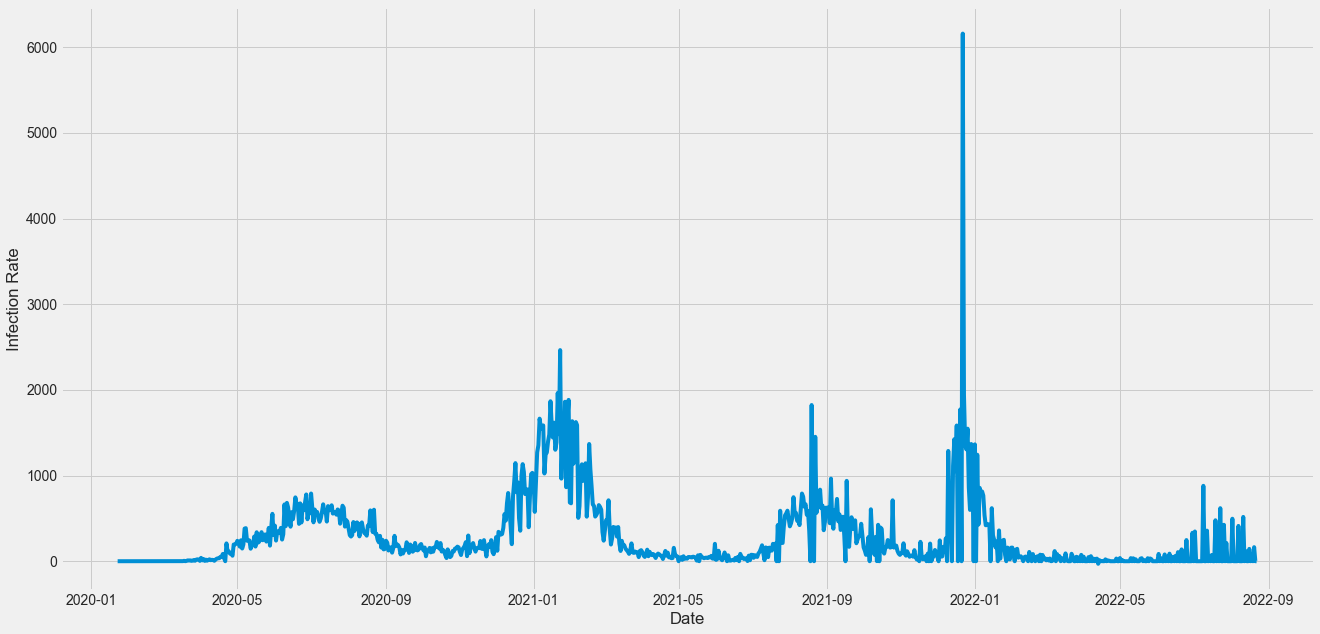

In [109]:
# Generating a line plot for daily infection rate in Nigeria from global data
plt.figure(figsize = (20,10))
sns.lineplot(x = 'Date', y = 'Infection Rate', data = JH_Daily_Confirmed_Nigeriadf)

TODO G -

>Calculate maximum infection rate for a day (Number of new cases)
>Find the date

#Calculating maximum infection rate for a day (Number of new cases)
#Find the date
Highest_infection_rate=JH_Daily_Confirmed_Nigeriadf['Infection Rate'].max()

In [111]:
Highest_infection_rate

6158.0

In [112]:
#Find the date
JH_Daily_Confirmed_Nigeriadf[JH_Daily_Confirmed_Nigeriadf['Infection Rate'] == 6158.0]

,Date,Confirmed Cases,Infection Rate
700,2021-12-22,231413,6158.0


In [113]:
#Calculating minimum infection rate for a day (Number of new cases)
Lowest_infection_rate=JH_Daily_Confirmed_Nigeriadf['Infection Rate'].min()
Lowest_infection_rate

-30.0

In [114]:
#Find the date for minimum infection rate
JH_Daily_Confirmed_Nigeriadf[JH_Daily_Confirmed_Nigeriadf['Infection Rate'] == -30.0]

,Date,Confirmed Cases,Infection Rate
812,2022-04-13,255633,-30.0


TODO H - Determine the relationship between the external dataset and the NCDC COVID-19 dataset. Here you will generate a line plot of top 10 confirmed cases and the overall community vulnerability index on the same axis. From the graph, explain your observation.
Steps

>Combine the two dataset together on a common column(states)
>Create a new dataframe for plotting. This DataFrame will contain top 10 states in terms of confirmed cases i.e sort by confirmed cases. Hint: Check out Pandas nlargest function. This tutorial can help out
>Plot both variable on the same axis. Check out this tutorial

# Determining the relationship between the external dataset and the NCDC COVID-19 dataset. 
# Will generate and explain a line plot of top 10 confirmed cases and the overall community vulnerability index on the same axis. 

In [115]:
#Combine the two dataset together on a common column(states)
NCDC_external = covidnig_rn.merge(covid_external, on = 'states', how = 'inner')


In [116]:
#Obtain top 10 Lab confirmed cases fro external data using df.nlargest()
Top10_NCDC_external = NCDC_external.nlargest(10, 'No. of Cases (Lab Confirmed)')

In [117]:
Top10_NCDC_external

,states,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
16,Abia,980.0,25.0,945.0,10,South East,4190000,0.2,0.9,0.6,0.1,0.3,0.9,0.2,0.0,1.14
17,Osun,979.0,20.0,937.0,22,South West,5252000,0.0,0.7,0.4,0.4,0.0,0.8,0.1,0.2,1.06
18,Bauchi,897.0,108.0,775.0,14,North East,7270000,0.8,0.1,0.2,0.8,0.8,0.2,0.8,0.8,0.85
19,Borno,778.0,37.0,705.0,36,North East,6651000,0.9,0.3,0.1,1.0,1.0,0.1,0.7,0.9,0.89
20,Imo,734.0,61.0,661.0,12,South East,6018000,0.4,1.0,0.9,0.0,0.4,0.9,0.4,0.0,1.12
21,Benue,515.0,44.0,460.0,11,North Central,6376000,0.5,0.7,0.5,0.7,0.4,0.4,0.3,0.5,0.91
22,Bayelsa,497.0,55.0,421.0,21,South South,2606000,0.5,0.8,0.6,0.1,0.9,0.5,0.2,0.7,1.00
23,Ekiti,405.0,24.0,375.0,6,South West,3593000,0.3,0.8,0.3,0.5,0.2,0.8,0.1,0.4,1.03
24,Akwa Ibom,395.0,44.0,342.0,9,South East,6093000,0.7,0.8,0.7,0.6,0.8,0.8,0.5,0.1,1.01
25,Jigawa,386.0,57.0,318.0,11,North West,6435000,0.9,0.4,0.0,0.7,0.6,0.5,0.9,0.8,0.92


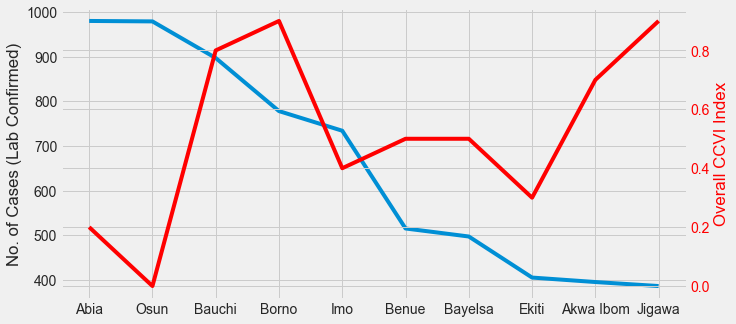

In [118]:
# 2-axis plotting to establish relationship between overal CCVI index and Lab confirmed cases 
fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(1,1,1)
ax1.plot(Top10_NCDC_external['states'], Top10_NCDC_external['No. of Cases (Lab Confirmed)'])
ax1.set_ylabel('No. of Cases (Lab Confirmed)')

ax2 = ax1.twinx()
ax2.plot(Top10_NCDC_external['states'], Top10_NCDC_external['Overall CCVI Index'], 'r-')
ax2.set_ylabel('Overall CCVI Index', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')






Benue, Borno, Bayelsa, Ekiti, Akwa-Ibom and Jigawa all indicated inverse relationship between the No. of Cases (Lab Confirmed) and Overall CCVI Index i.e as Number of Cases (Lab Confirmed) decreased, Overall CCVI Index tended to increase across these states with Jigawa having the highest overall ccvi index but with lowest lab confirmed cases. For Abia, Osun, Imo, overall ccvi index were lower at higher confirmed lab csaes. Bauchi state showed that high number of confirmed cases was at par with its high overall ccvi index i.e the impact of covid crisis can be directly linked to number of confirmed cases. Inverse relationships for other states further suggests that impact of covid crisis is unconnected to number confirmed lab cases alone.

In [ ]:
#Further Analysis

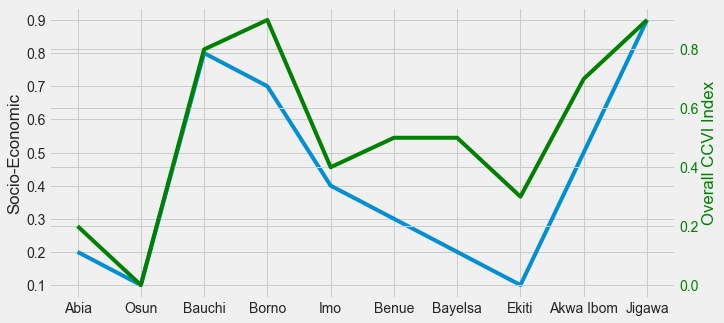

In [121]:
# 2-axis plotting to establish relationship between overal CCVI index and Socio-Economic index
fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(1,1,1)
ax1.plot(Top10_NCDC_external['states'], Top10_NCDC_external['Socio-Economic'])
ax1.set_ylabel('Socio-Economic')

ax2 = ax1.twinx()
ax2.plot(Top10_NCDC_external['states'], Top10_NCDC_external['Overall CCVI Index'], 'g-')
ax2.set_ylabel('Overall CCVI Index', color='g')
for tl in ax2.get_yticklabels():
    tl.set_color('g')

For the top 10 states, here we see some direct correlation between Socio-Economic indices and overall CCVI index in most states. Generally Overall CCVI index are higher than Socio-Economic indices as Osun and Bauchi and Jigawa. Osun state had the lowest and equal Socio-Economic indices and Overall CCV index. Jigawa had the highest and equal Socio-Economic index and Overall CCVI index. It can be infered that the impact of the covid crisis is generally higher and can be traced to Socio-Economic indices such as poverty, unemployment, e.t.c 

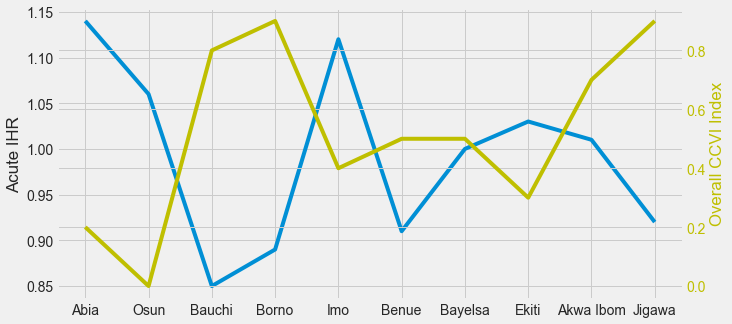

In [122]:
#2-axis plotting to establish relationship between overal CCVI index and Acute IHR Index.
fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(1,1,1)
ax1.plot(Top10_NCDC_external['states'], Top10_NCDC_external['Acute IHR'])
ax1.set_ylabel('Acute IHR')

ax2 = ax1.twinx()
ax2.plot(Top10_NCDC_external['states'], Top10_NCDC_external['Overall CCVI Index'], 'y-')
ax2.set_ylabel('Overall CCVI Index', color='y')
for tl in ax2.get_yticklabels():
    tl.set_color('y')

Inverse correlation between Overall CCVI index and Acute IHR were observed in all top 10 states. Abia, Osun, Imo and Ekiti states had lower Overall CCVI index with relatively higher Acute IHR. Abia had the highest Acute IHR index and Jigawa the lowest. Borno and Jigawa had the highest Overall CCVI index. Bauchi, Borno, Benue and Jigawa Sates have the higher Overall CCVI index with correspondingly lower Acute IHR index. Borno and Jigawa had the highest Overall CCVI index. Thses observation suggests that the impact of covid crisis cannot be traced to Acute IHR alone. 

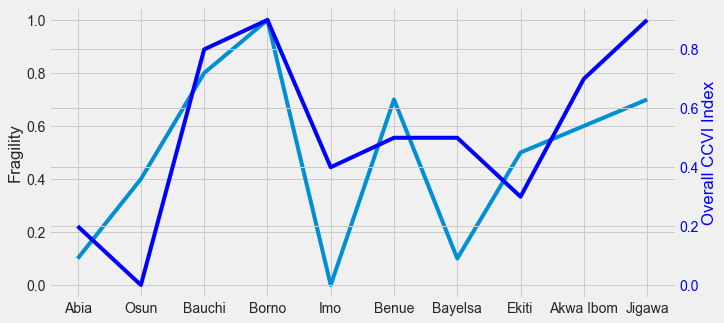

In [128]:
#2-axis plotting to establish relationship between overal CCVI index and Fragility index.
fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(1,1,1)
ax1.plot(Top10_NCDC_external['states'], Top10_NCDC_external['Fragility'])
ax1.set_ylabel('Fragility')

ax2 = ax1.twinx()
ax2.plot(Top10_NCDC_external['states'], Top10_NCDC_external['Overall CCVI Index'], 'b-')
ax2.set_ylabel('Overall CCVI Index', color='b')
for tl in ax2.get_yticklabels():
    tl.set_color('b')


Inverse correlation is observed between Fragility index and Overall CCVI index in almost all the top 10 states being considered here. While Osun, Benue and Ekiti all had lower Overall CCVI index with a correspondingly higher Fragility index, Abia, Bauchi, Imo, Bayelsa, Akwa Ibom and Jigawa states all had higher Overall CCVI index with correspondingly lower Fragility index. Only Borno showed equal Fragility and Overall CCVI indices. It is therefore inferable that Fragility alone can be responsible for the recorded impact of the covid crisis in Borno. This is however not applicable to other members of the top 10 states where Fragility alone may not be responsible for the recorded impact of covid crisis.

TODO I - Determine the relationship between the external dataset and the NCDC COVID-19 dataset.

>Here you will generate a regression plot between two variables to visualize the linear relationships - Confirmed Cases and Population Density. Hint: Check out Seaborn Regression Plot.
>Provide a summary of your observation

# Determining the relationship between the external dataset and the NCDC COVID-19 dataset.

#Generating a regression plot between two variables to visualize the linear relationships - Confirmed Cases and Population Density. Hint: Check out Seaborn Regression Plot.

#Also will Provide a summary of observation

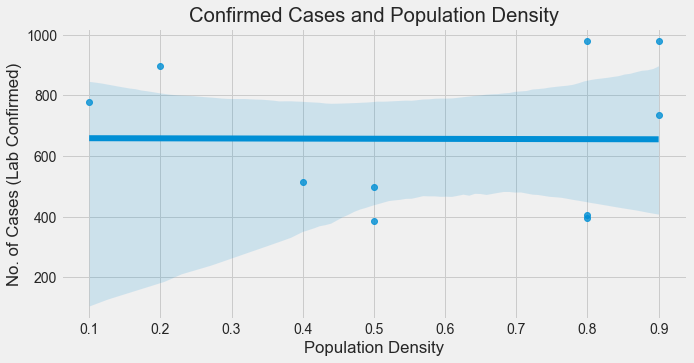

In [355]:
#Regression plot between Confirmed cases population density of top 10 states.
# regplot
plt.figure(figsize = (10,5))
ax = sns.regplot(x="Population Density", y="No. of Cases (Lab Confirmed)", data=Top10_NCDC_external).set_title('Confirmed Cases and Population Density')

For the top ten (10) highest confirmed cases, it is generally observed that there is higher uniformity in distribution of confirmed cases across most population densities in states in Nigeria. However, a few outliers (exception to this case) exists: There are five occurences which are above the common distribution value across states and there are five occurences which are below the common distribution value in states of various population densities.  

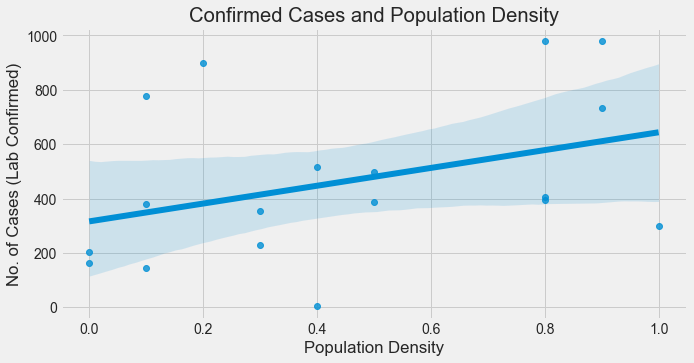

In [430]:
# Regression Plot for Lab confirmed cases vs population density for all states
plt.figure(figsize = (10,5))
ax = sns.regplot(x="Population Density", y="No. of Cases (Lab Confirmed)", data=NCDC_external).set_title('Confirmed Cases and Population Density')

The general trend indicates that higher record of Lab confirmed cases is associated with higher population densities across all states. There are also many outlier cases that does not align with this trend i.e does not show that higher or lower confirmed cases connected with higher or lower pouplation densities.

In [131]:
# Further analysis on other indicators: Recovery rate
JH_Daily_Recovery_Nigeriadf['Recovery Rate'] = JH_Daily_Recovery_Nigeriadf['Recovered Cases'].diff()


In [132]:
# Further analysis on other indicators: Death rate
JH_Daily_DeathsNigeriadf['Death Rate'] = JH_Daily_DeathsNigeriadf['Death Cases'].diff()


Text(0.5, 1.0, 'Daily Recovery Rate in Nigeria')

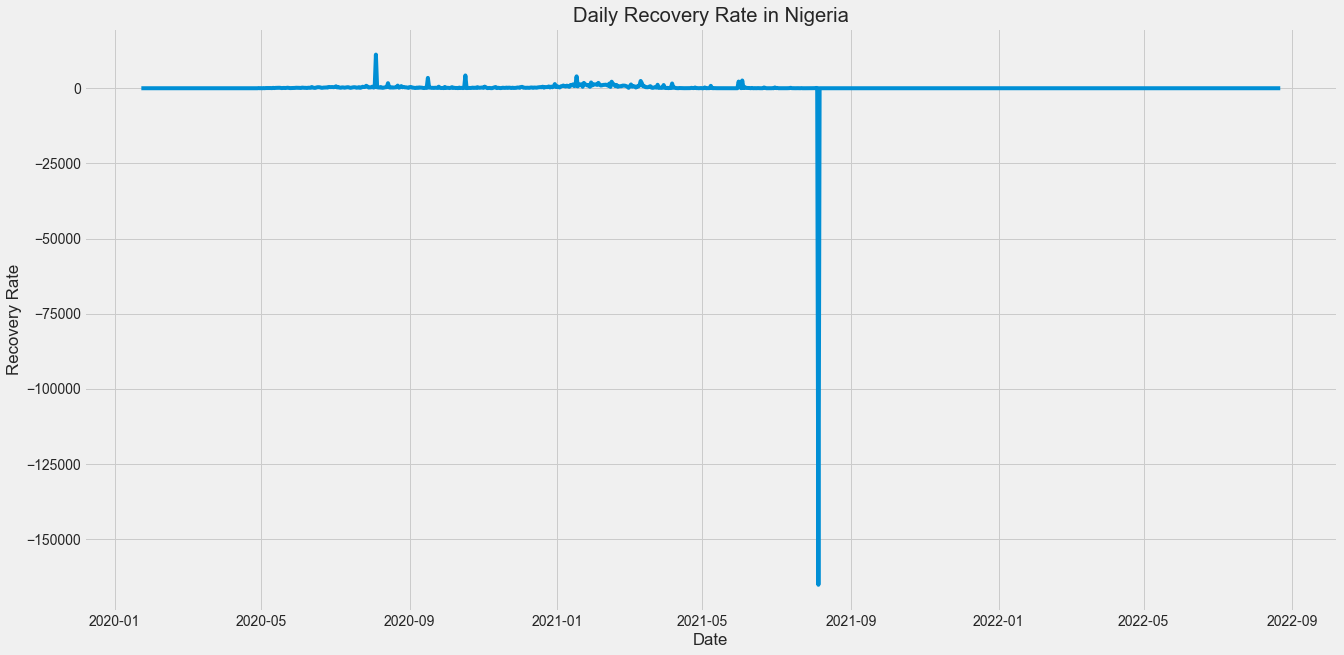

In [139]:
# Further analysis on other indicators: lineplot of Recovery rate 
plt.figure(figsize = (20,10))
sns.lineplot(x = 'Date', y = 'Recovery Rate', data = JH_Daily_Recovery_Nigeriadf).set_title('Daily Recovery Rate in Nigeria')

The highest recorded rate of recovery of 11188.0 was made on 2020-08-04 while the lowest was -165208.0 on 2021-08-05.

In [140]:
# Highest recovery rate
Highest_recovery_rate=JH_Daily_Recovery_Nigeriadf['Recovery Rate'].max()
Highest_recovery_rate

11188.0

In [141]:
#Find the date
JH_Daily_Recovery_Nigeriadf[JH_Daily_Recovery_Nigeriadf['Recovery Rate'] == 11188.0]

,Date,Recovered Cases,Recovery Rate
195,2020-08-04,31851,11188.0


In [142]:
Lowest_recovery_rate=JH_Daily_Recovery_Nigeriadf['Recovery Rate'].min()
Lowest_recovery_rate

-165208.0

In [143]:
#Find the date

JH_Daily_Recovery_Nigeriadf[JH_Daily_Recovery_Nigeriadf['Recovery Rate'] == -165208.0]

,Date,Recovered Cases,Recovery Rate
561,2021-08-05,0,-165208.0


Text(0.5, 1.0, 'Daily Death Rate in Nigeria')

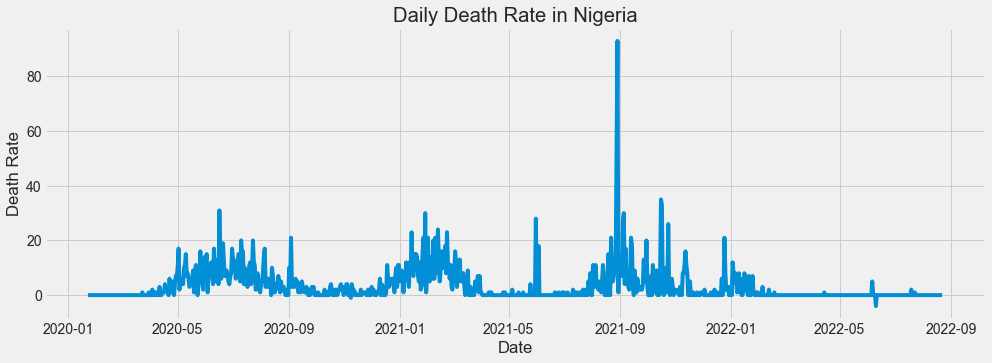

In [144]:
# Further analysis on other indicators: Seaborn's lineplot Death rate
plt.figure(figsize = (15,5))
sns.lineplot(x = 'Date', y = 'Death Rate', data = JH_Daily_DeathsNigeriadf).set_title('Daily Death Rate in Nigeria')

There was a spike in the death rate in Nigeria on 2021-08-29 with a record high of 93.0. The reason may be because that relaxed perventive measures with apparent ease of local restrictions. The lowest death rate of -4.0 was recorded on 2022-06-10 perhaps due to the success at global control the corona virus, especially in year 2022.

In [145]:
Highest_death_rate = JH_Daily_DeathsNigeriadf['Death Rate'].max()
Highest_death_rate

93.0

In [146]:
#Find the date
JH_Daily_DeathsNigeriadf[JH_Daily_DeathsNigeriadf['Death Rate'] == 93.0]

,Date,Death Cases,Death Rate
585,2021-08-29,2454,93.0


In [147]:
Lowest_death_rate=JH_Daily_DeathsNigeriadf['Death Rate'].min()
Lowest_death_rate

-4.0

In [148]:
#Find the date
JH_Daily_DeathsNigeriadf[JH_Daily_DeathsNigeriadf['Death Rate'] ==-4.0]

,Date,Death Cases,Death Rate
870,2022-06-10,3144,-4.0


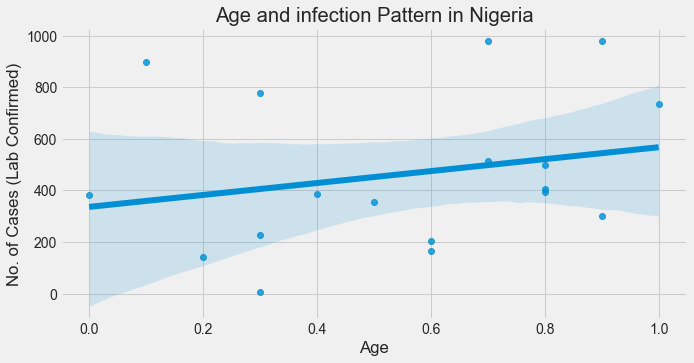

In [150]:
#Regression
plt.figure(figsize = (10,5))
ax = sns.regplot(x=NCDC_external["Age"], y=NCDC_external["No. of Cases (Lab Confirmed)"], data=NCDC_external).set_title('Age and infection Pattern in Nigeria')

The above plot displays the association between number of confirmed cases and age of populations. Though it can be infered from the regression trend that susceptibility to the covid infections are generally associated with elderly group in populations, many outliers indicates that many other age categories also were captured in high and low number of recorded lab confirmed cases.

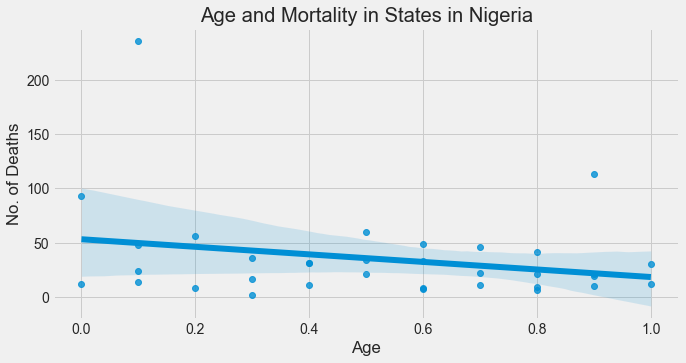

In [151]:
plt.figure(figsize = (10,5))
ax = sns.regplot(x="Age", y="No. of Deaths", data=NCDC_external).set_title('Age and Mortality in States in Nigeria')

Apparently, the number of deaths tends to be more in the younger population because they are more in the overall population compared to the elderly group. The trendline of the regression does however indicate that the number of deaths recorded among the elderly group is still significant because they are less in population compared to the younger populace.  

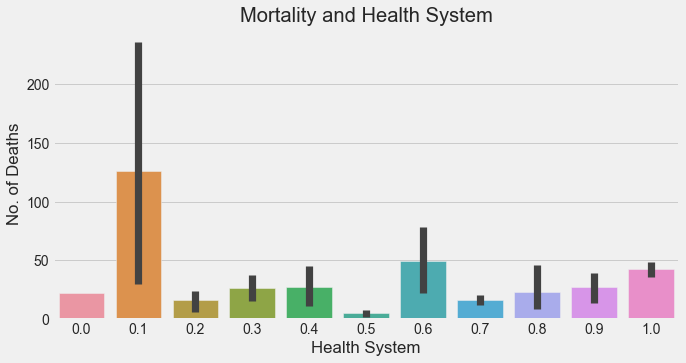

In [152]:
# Bar plot for Mortality and Health Systems
plt.figure(figsize = (10,5))
ax = sns.barplot(x="Health System", y="No. of Deaths", data=NCDC_external).set_title('Mortality and Health System')

From the bar plots above, it is not clear whether health systems in states in Nigeria had any significant influence on the number of deaths recorded during the covid crisis.

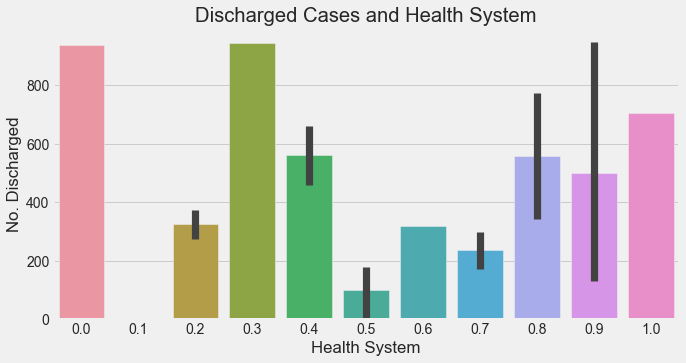

In [153]:
#Bar plot for Discharged cases and Health Systems
plt.figure(figsize = (10,5))
ax = sns.barplot(x="Health System", y="No. Discharged", data=NCDC_external).set_title('Discharged Cases and Health System')

Health systems of a country may influence the overall health impact of coroner virus. Higher system indices show that health crisis mangagemnt are more effective and therefore there are chances that there will be higher number of discharged cases.
So far from the barplot, it is inconclusive to say that the health system of Nigeria influenced the number of covid discharged cases in Nigeria. This is further highlighted by the large error bars which indicates higher measure of dispersion from any possible trend.

Text(0.5, 1.0, 'Health System in States')

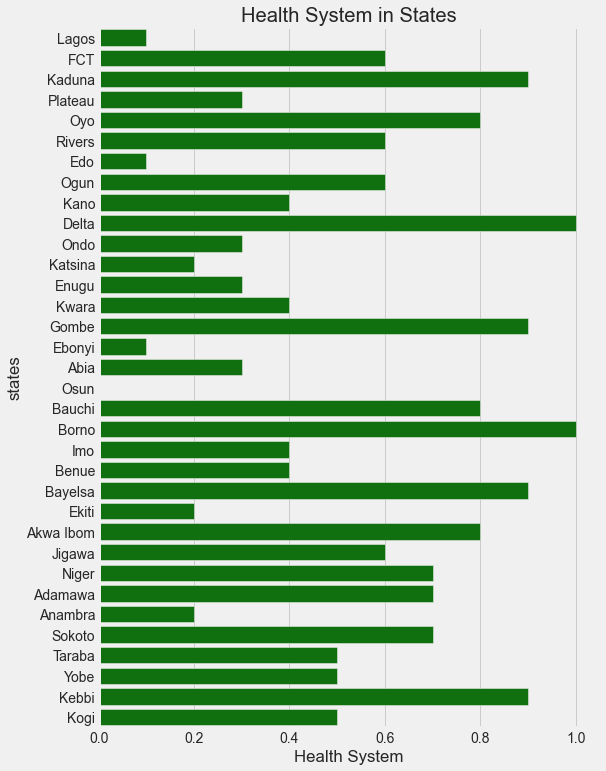

In [154]:
#Plotting Health System in States
plt.figure(figsize = (8,12))
sns.barplot(x = NCDC_external['Health System'], y = NCDC_external['states'], data = NCDC_external, color = 'green').set_title('Health System in States')

TODO L -
Determine the effect of the Pandemic on the economy. To do this, you will compare the Real GDP value Pre-COVID-19 with Real GDP in 2020 (COVID-19 Period, especially Q2 2020)
Steps

>From the Real GDP Data, generate a barplot using the GDP values for each year & quarters. For example: On x-axis you will have year 2017 and the bars will be values of each quarters(Q1-Q4). You expected to have subplots of each quarters on one graph.
>Hint: Use Pandas.melt to create your plot DataFrame
>Set your quarter legend to lower left.
>Using axhline, draw a horizontal line through the graph at the value of Q2 2020.
>Write out your observation


In [155]:
#Determine the effect of the Pandemic on the economy. To do this, you will compare the Real GDP value Pre-COVID-19 with Real GDP in 2020 (COVID-19 Period, especially Q2 2020)
#From the Real GDP Data, generate a barplot using the GDP values for each year & quarters. For example: On x-axis you will have year 2017 and the bars will be values of each quarters(Q1-Q4). You expected to have subplots of each quarters on one graph.
#Hint: Use Pandas.melt to create your plot DataFrame



In [156]:
#Declaring the dtat set to be used
RealGDP

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59
5,2019,16434552.65,16931434.89,18494114.17,19530000.00
6,2020,16740000.00,15890000.00,17820000.00,0.00


In [157]:
#Restructuring the RealGDP dataframe for easy readability and accessibility
Q_RealGDP= pd.melt(RealGDP, id_vars=['Year'], var_name='Quarter', value_name='Amount in Billion(N)')

In [158]:
Q_RealGDP

,Year,Quarter,Amount in Billion(N)
0,2014,Q1,15438679.50
1,2015,Q1,16050601.38
2,2016,Q1,15943714.54
3,2017,Q1,15797965.83
4,2018,Q1,16096654.19
5,2019,Q1,16434552.65
6,2020,Q1,16740000.00
7,2014,Q2,16084622.31
8,2015,Q2,16463341.91
9,2016,Q2,16218542.41


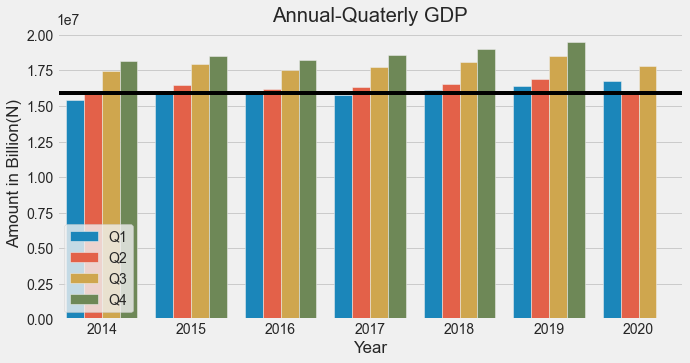

In [159]:
# generating a seaborn's barplot using the GDP values for each year & quarters
plt.figure(figsize = (10,5))
sns.barplot(x = 'Year', y = 'Amount in Billion(N)',hue = 'Quarter', data =Q_RealGDP).set_title('Annual-Quaterly GDP')
plt.legend(loc = 'lower left')
plt.axhline(y =15890000.00, label ='Hline', color ='black')

The second quarter of 2020 (onset of impact of pandemic in Nigeria) was used to apply an axhline threashold and bench mark for comparison of dataset parameters. 


There is no record for the fourth quarter's GDP in 2020 


Economic activities during the fourth quarter was virtually grounded hence there is no record of GDP for fourth quater of 2020. This also means that 2020 has the lowest combined GDP in the years under review. 


The impact of covid 19 was huge on Nigeria's economy around the second quarter, in 2020, because that was when the highest cases of daily infection were recorded.  


The negative effects of covid on the population and the control measures enforced by the government affected productivity, all compared to other years included in the review. 

Note: Do not limit your analysis to the provided TODOs. Perform more analyses e.g
>Check for more external dataset
>Ask more questions & find the right answers by exploring the data